In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [ ]:
#loading of file
df = pd.read_csv("val_stats.csv",low_memory=False)
pd.set_option("display.max_columns", None)

In [ ]:
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,kd_ratio,kills_round,most_kills,score_round,wins,win_percent,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,161,"1,506","1,408",703,1.07,0.7,29,208.8,59,59.6,Fade,Viper,Omen,Vandal,35,59,5,802,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,316,"1,608","1,187",206,1.35,1.0,32,270.6,52,65.8,Chamber,Jett,Raze,Vandal,41,56,3,689,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,216,"1,115","1,064",267,1.05,0.8,39,227.8,42,65.6,Yoru,Jett,Chamber,Vandal,38,57,4,444,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,235,"1,134",812,157,1.40,1.0,37,277.0,32,62.8,Jett,Chamber,KAY/O,Vandal,51,47,2,754,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,137,869,781,213,1.11,0.8,29,230.9,32,62.8,Jett,Raze,Chamber,Vandal,36,60,4,419,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,56,603,508,296,1.19,0.7,24,210.1,32,76.2,Sova,Viper,Sage,Phantom,26,68,6,190,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,106,885,606,271,1.46,1.0,32,285.8,32,80.0,Viper,Sage,Omen,Phantom,36,60,4,400,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,185,919,733,136,1.25,0.9,33,247.9,26,52.0,Chamber,Reyna,Neon,Vandal,46,50,4,373,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,19,204,174,101,1.17,0.8,27,235.0,8,66.7,Brimstone,Viper,KAY/O,Vandal,28,67,5,89,Phantom,39,57,3,37,Spectre,27,69,4,17


In [ ]:
#Data PreProcessing
df['region'].fillna(method = 'bfill', inplace = True)

In [ ]:
df['tag'].fillna(method = 'bfill', inplace = True)

In [ ]:
df['agent_2'].fillna(method = 'bfill', inplace = True)

In [ ]:
df['agent_3'].fillna(method = 'bfill', inplace = True)

In [ ]:
#Label encoding for encoding the features
le = preprocessing.LabelEncoder()
df['gun1_name'] = le.fit_transform(df['gun1_name'])
df['gun2_name'] = le.fit_transform(df['gun2_name'])
df['gun3_name'] = le.fit_transform(df['gun3_name'])

In [ ]:
#removing commas to convert string to float as values are garbage for training
df["headshots"] = [int(str(i).replace(",", "")) for i in df["headshots"]]
df["gun2_kills"] = [int(str(i).replace(",", "")) for i in df["gun2_kills"]]
df["gun1_kills"] = [int(str(i).replace(",", "")) for i in df["gun1_kills"]]
df["gun3_kills"] = [int(str(i).replace(",", "")) for i in df["gun3_kills"]]

In [ ]:
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,kd_ratio,kills_round,most_kills,score_round,wins,win_percent,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,EU,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,161,"1,506","1,408",703,1.07,0.7,29,208.8,59,59.6,Fade,Viper,Omen,Vandal,35,59,5,802,Phantom,33,62,5,220,Classic,36,60,3,147
1,EU,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,316,"1,608","1,187",206,1.35,1.0,32,270.6,52,65.8,Chamber,Jett,Raze,Vandal,41,56,3,689,Operator,8,91,0,226,Phantom,32,63,5,137
2,EU,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,216,"1,115","1,064",267,1.05,0.8,39,227.8,42,65.6,Yoru,Jett,Chamber,Vandal,38,57,4,444,Phantom,36,61,3,231,Operator,8,91,1,102
3,EU,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,235,"1,134",812,157,1.40,1.0,37,277.0,32,62.8,Jett,Chamber,KAY/O,Vandal,51,47,2,754,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,EU,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,137,869,781,213,1.11,0.8,29,230.9,32,62.8,Jett,Raze,Chamber,Vandal,36,60,4,419,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,56,603,508,296,1.19,0.7,24,210.1,32,76.2,Sova,Viper,Sage,Phantom,26,68,6,190,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,106,885,606,271,1.46,1.0,32,285.8,32,80.0,Viper,Sage,Omen,Phantom,36,60,4,400,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,185,919,733,136,1.25,0.9,33,247.9,26,52.0,Chamber,Reyna,Neon,Vandal,46,50,4,373,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,19,204,174,101,1.17,0.8,27,235.0,8,66.7,Brimstone,Viper,KAY/O,Vandal,28,67,5,89,Phantom,39,57,3,37,Spectre,27,69,4,17


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,kills,deaths,assists,kd_ratio,kills_round,most_kills,score_round,wins,win_percent,agent_1,agent_2,agent_3,gun1_name,gun1_head,gun1_body,gun1_legs,gun1_kills,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,EU,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,161,"1,506","1,408",703,1.07,0.7,29,208.8,59,59.6,Fade,Viper,Omen,Vandal,35,59,5,802,Phantom,33,62,5,220,Classic,36,60,3,147
1,EU,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,316,"1,608","1,187",206,1.35,1.0,32,270.6,52,65.8,Chamber,Jett,Raze,Vandal,41,56,3,689,Operator,8,91,0,226,Phantom,32,63,5,137
2,EU,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,216,"1,115","1,064",267,1.05,0.8,39,227.8,42,65.6,Yoru,Jett,Chamber,Vandal,38,57,4,444,Phantom,36,61,3,231,Operator,8,91,1,102
3,EU,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,235,"1,134",812,157,1.40,1.0,37,277.0,32,62.8,Jett,Chamber,KAY/O,Vandal,51,47,2,754,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,EU,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,137,869,781,213,1.11,0.8,29,230.9,32,62.8,Jett,Raze,Chamber,Vandal,36,60,4,419,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,56,603,508,296,1.19,0.7,24,210.1,32,76.2,Sova,Viper,Sage,Phantom,26,68,6,190,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,106,885,606,271,1.46,1.0,32,285.8,32,80.0,Viper,Sage,Omen,Phantom,36,60,4,400,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,185,919,733,136,1.25,0.9,33,247.9,26,52.0,Chamber,Reyna,Neon,Vandal,46,50,4,373,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,19,204,174,101,1.17,0.8,27,235.0,8,66.7,Brimstone,Viper,KAY/O,Vandal,28,67,5,89,Phantom,39,57,3,37,Spectre,27,69,4,17


<AxesSubplot:>

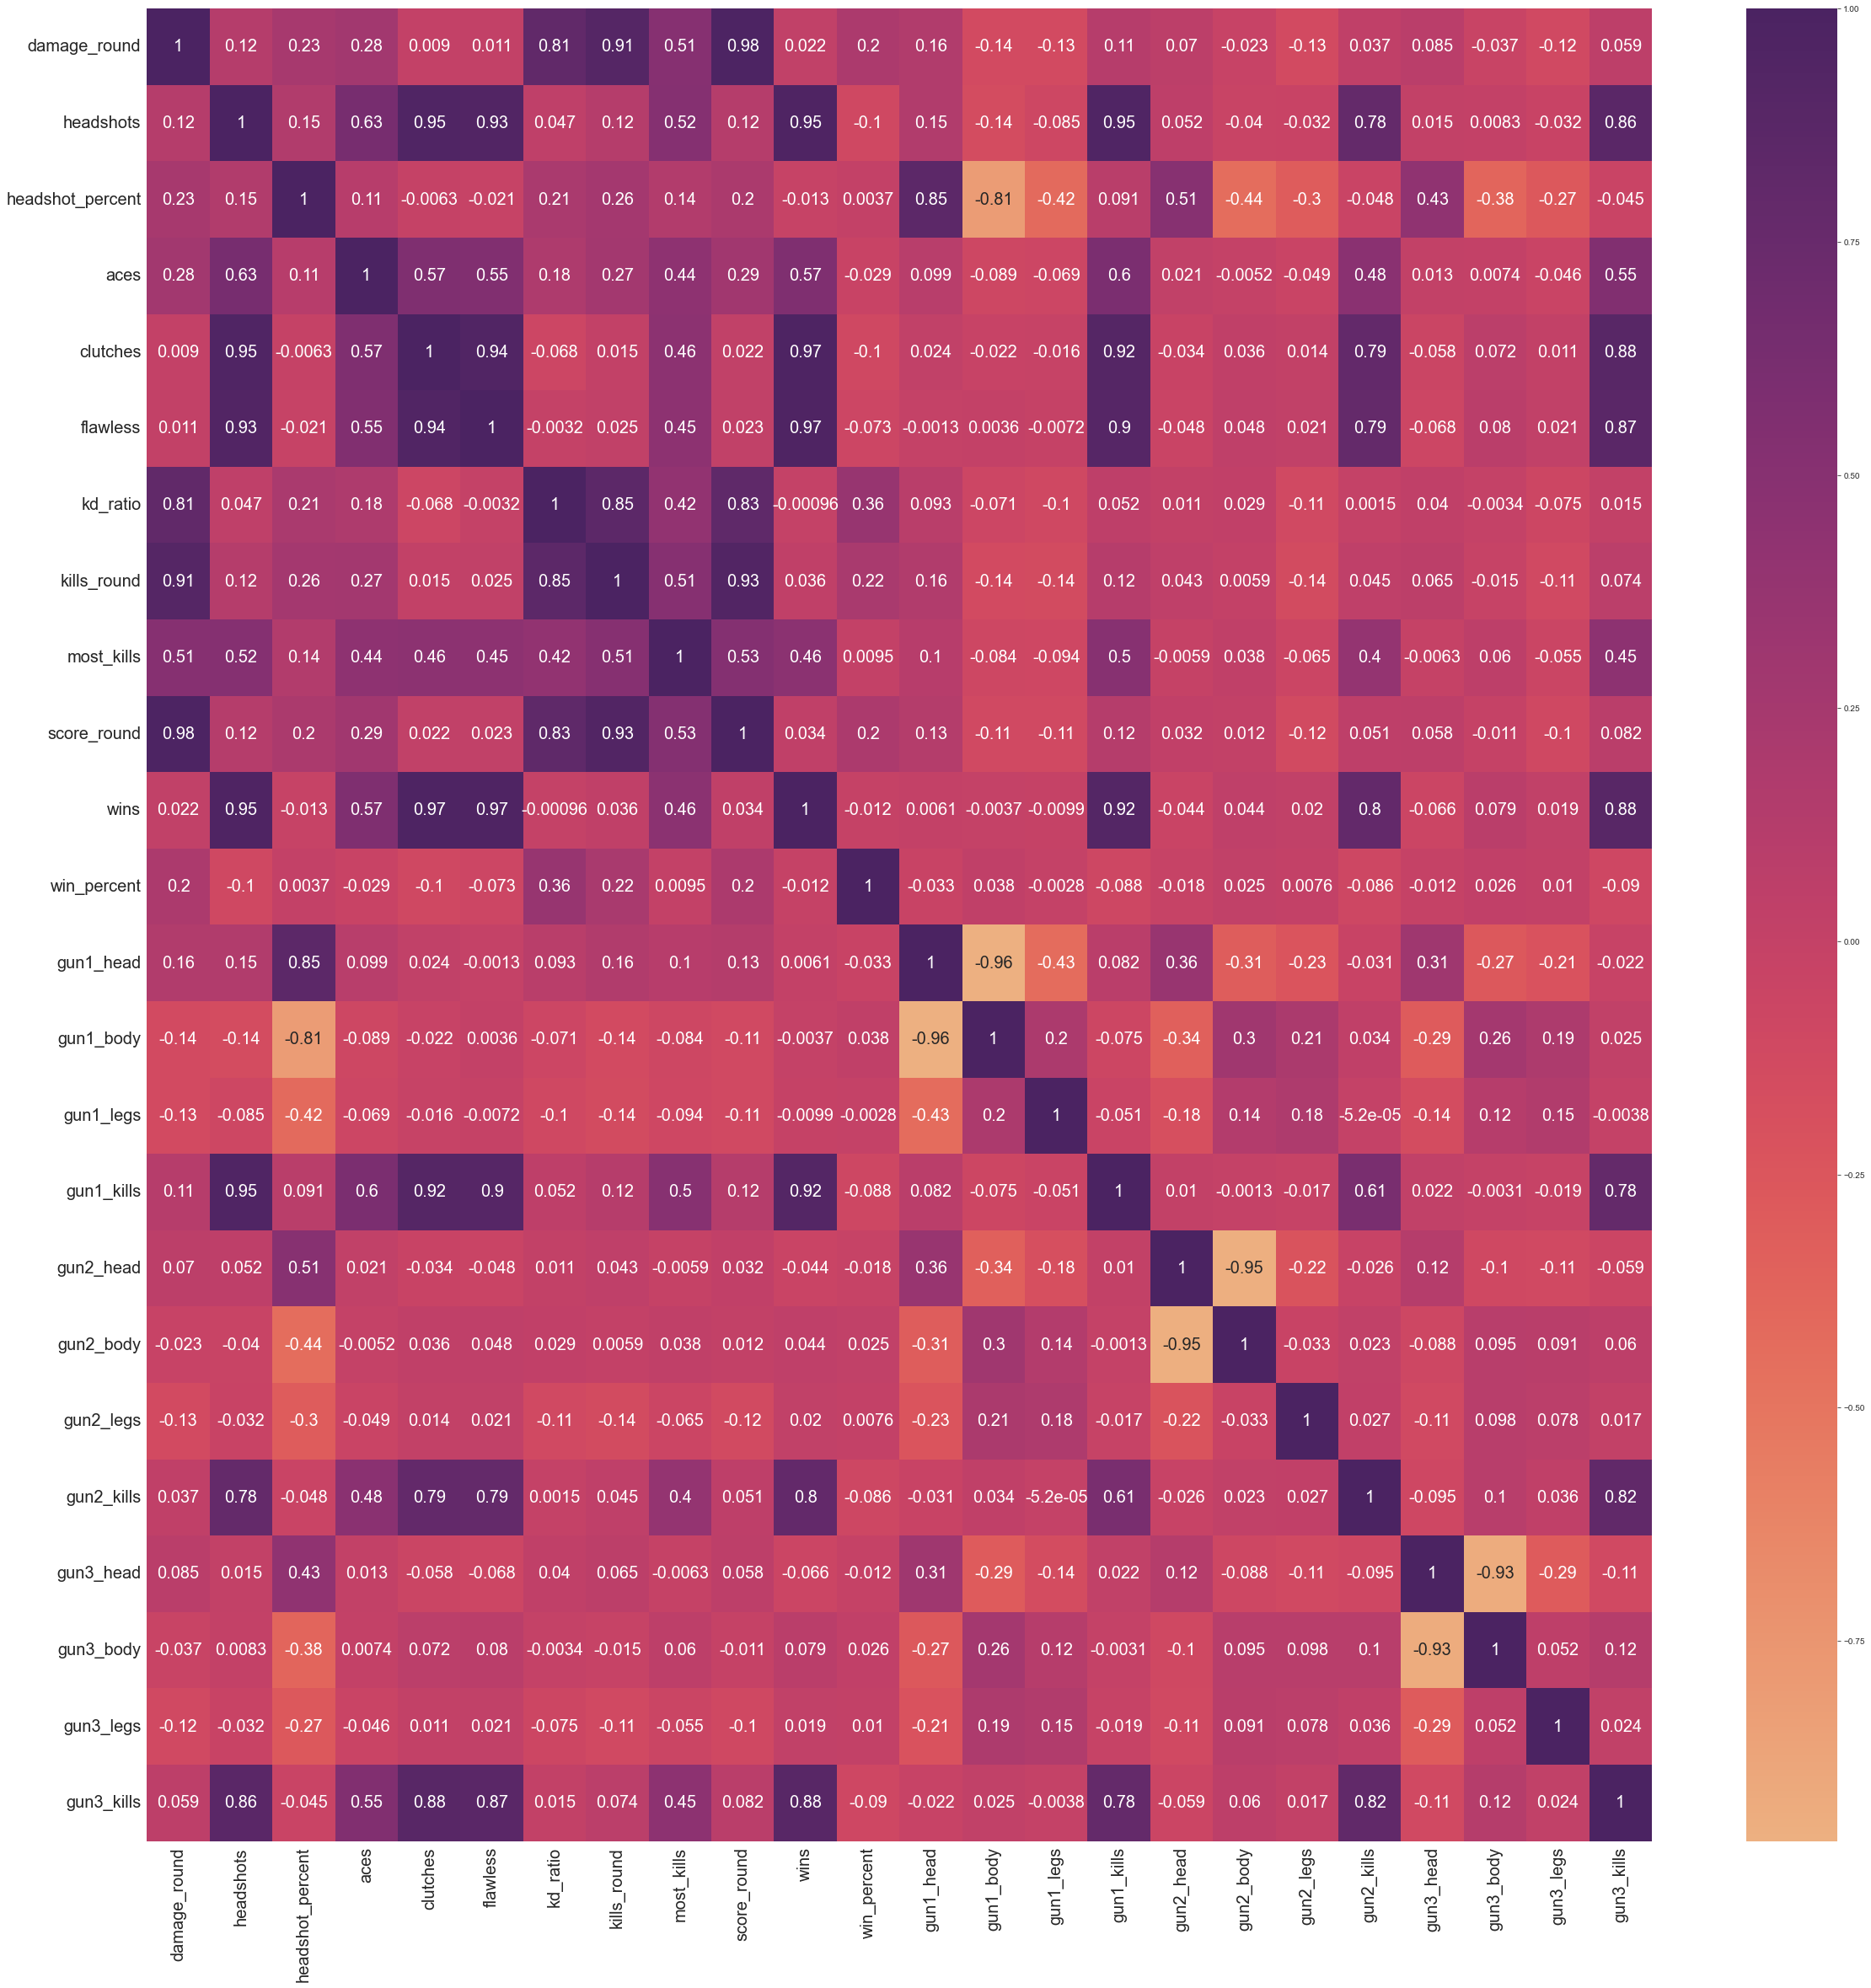

In [ ]:
plt.figure(figsize=(40,40))
sns.set_style('darkgrid')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(df.corr() ,annot=True, cmap=sns.color_palette("flare", as_cmap=True), annot_kws={"size": 20})

In [ ]:
x = df[['most_kills','headshots','clutches','gun1_kills','gun2_kills','gun3_kills','flawless','aces']]
y = df[['wins']]

In [ ]:
x

,most_kills,headshots,clutches,gun1_kills,gun2_kills,gun3_kills,flawless,aces
0,29,992,140,802,220,147,80,0
1,32,879,122,689,226,137,94,2
2,39,720,117,444,231,102,59,3
3,37,856,83,754,48,36,49,3
4,29,534,71,419,65,64,38,2
...,...,...,...,...,...,...,...,...
85673,24,342,58,190,175,71,54,0
85674,32,650,77,400,212,139,42,4
85675,33,613,70,373,159,87,54,0
85676,27,132,23,89,37,17,18,0


In [ ]:
y

,wins
0,59
1,52
2,42
3,32
4,32
...,...
85673,32
85674,32
85675,26
85676,8


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 30)

In [ ]:
#LinearRegression
LiR = LinearRegression()

In [ ]:
LiR.fit(x_train,y_train)

LinearRegression()

In [ ]:
LiR_pred = LiR.predict(x_test)

In [ ]:
LiR_pred

array([[36.09285508],
       [14.13330122],
       [11.66975651],
       ...,
       [ 9.17146644],
       [40.50791422],
       [96.76405882]])

In [ ]:
print('r2 score: ',(r2_score(y_test,LiR_pred))*100)

r2 score:  96.85283509971866


In [ ]:
print(mean_squared_error(y_test,LiR_pred))

10.42340898847421


In [ ]:
sv = SVR()

In [ ]:
sv.fit(x_train,y_train)

C:\Users\shaho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [ ]:
sv_pred = sv.predict(x_test)

In [ ]:
sv_pred

array([36.25297588, 13.57562446, 10.85319969, ...,  9.84926174,
       40.53865583, 98.69866195])

In [ ]:
print('r2 score: ',(r2_score(y_test,sv_pred))*100)

r2 score:  96.24545585007425


In [ ]:
print(mean_squared_error(y_test,sv_pred))

12.435048839182468


In [ ]:
#RandomClassifer
RC = RandomForestClassifier(max_depth = 80,n_estimators = 130,min_samples_leaf = 70)

In [ ]:
RC.fit(x_train,y_train.values.ravel())

RandomForestClassifier(max_depth=80, min_samples_leaf=70, n_estimators=130)

In [ ]:
RC_pred = RC.predict(x_test)

In [ ]:
RC_pred

array([37, 13, 10, ...,  9, 40, 94], dtype=int64)

In [ ]:
print('Accuracy score: ',accuracy_score(y_test,RC_pred))

Accuracy score:  0.17103061899389177


In [ ]:
df.to_csv('cleanedDF')